In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [70]:
diabetes=pd.read_csv("diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [71]:
diabetes.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [72]:
diabetes.tail

<bound method NDFrame.tail of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [73]:
diabetes.shape

(768, 9)

In [74]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [75]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [76]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

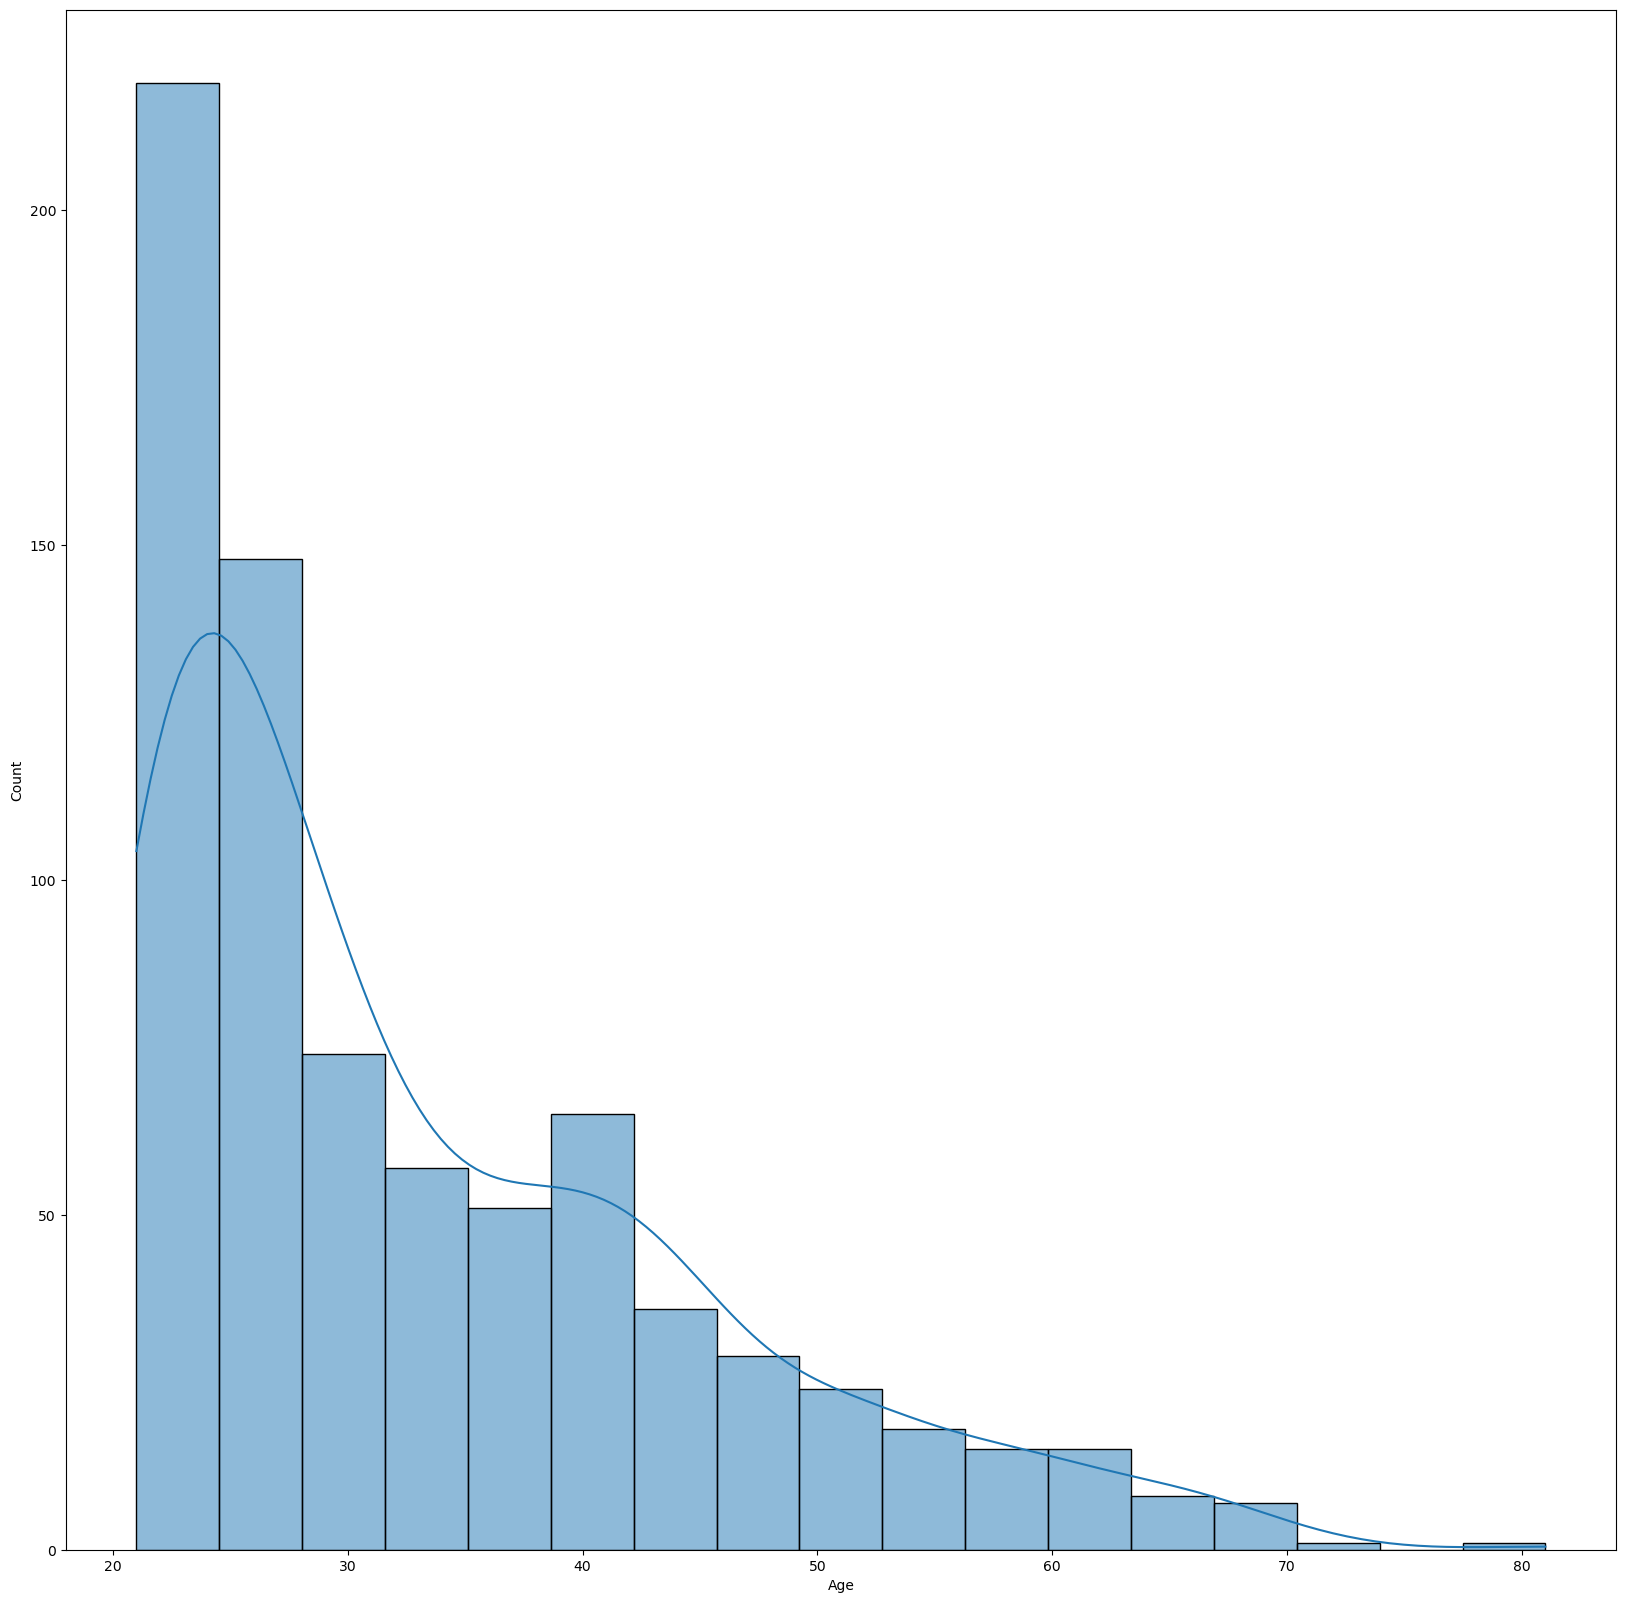

In [77]:
plt.figure(figsize=(20,20))
sns.histplot(x='Age',data=diabetes,kde='True')
plt.show()

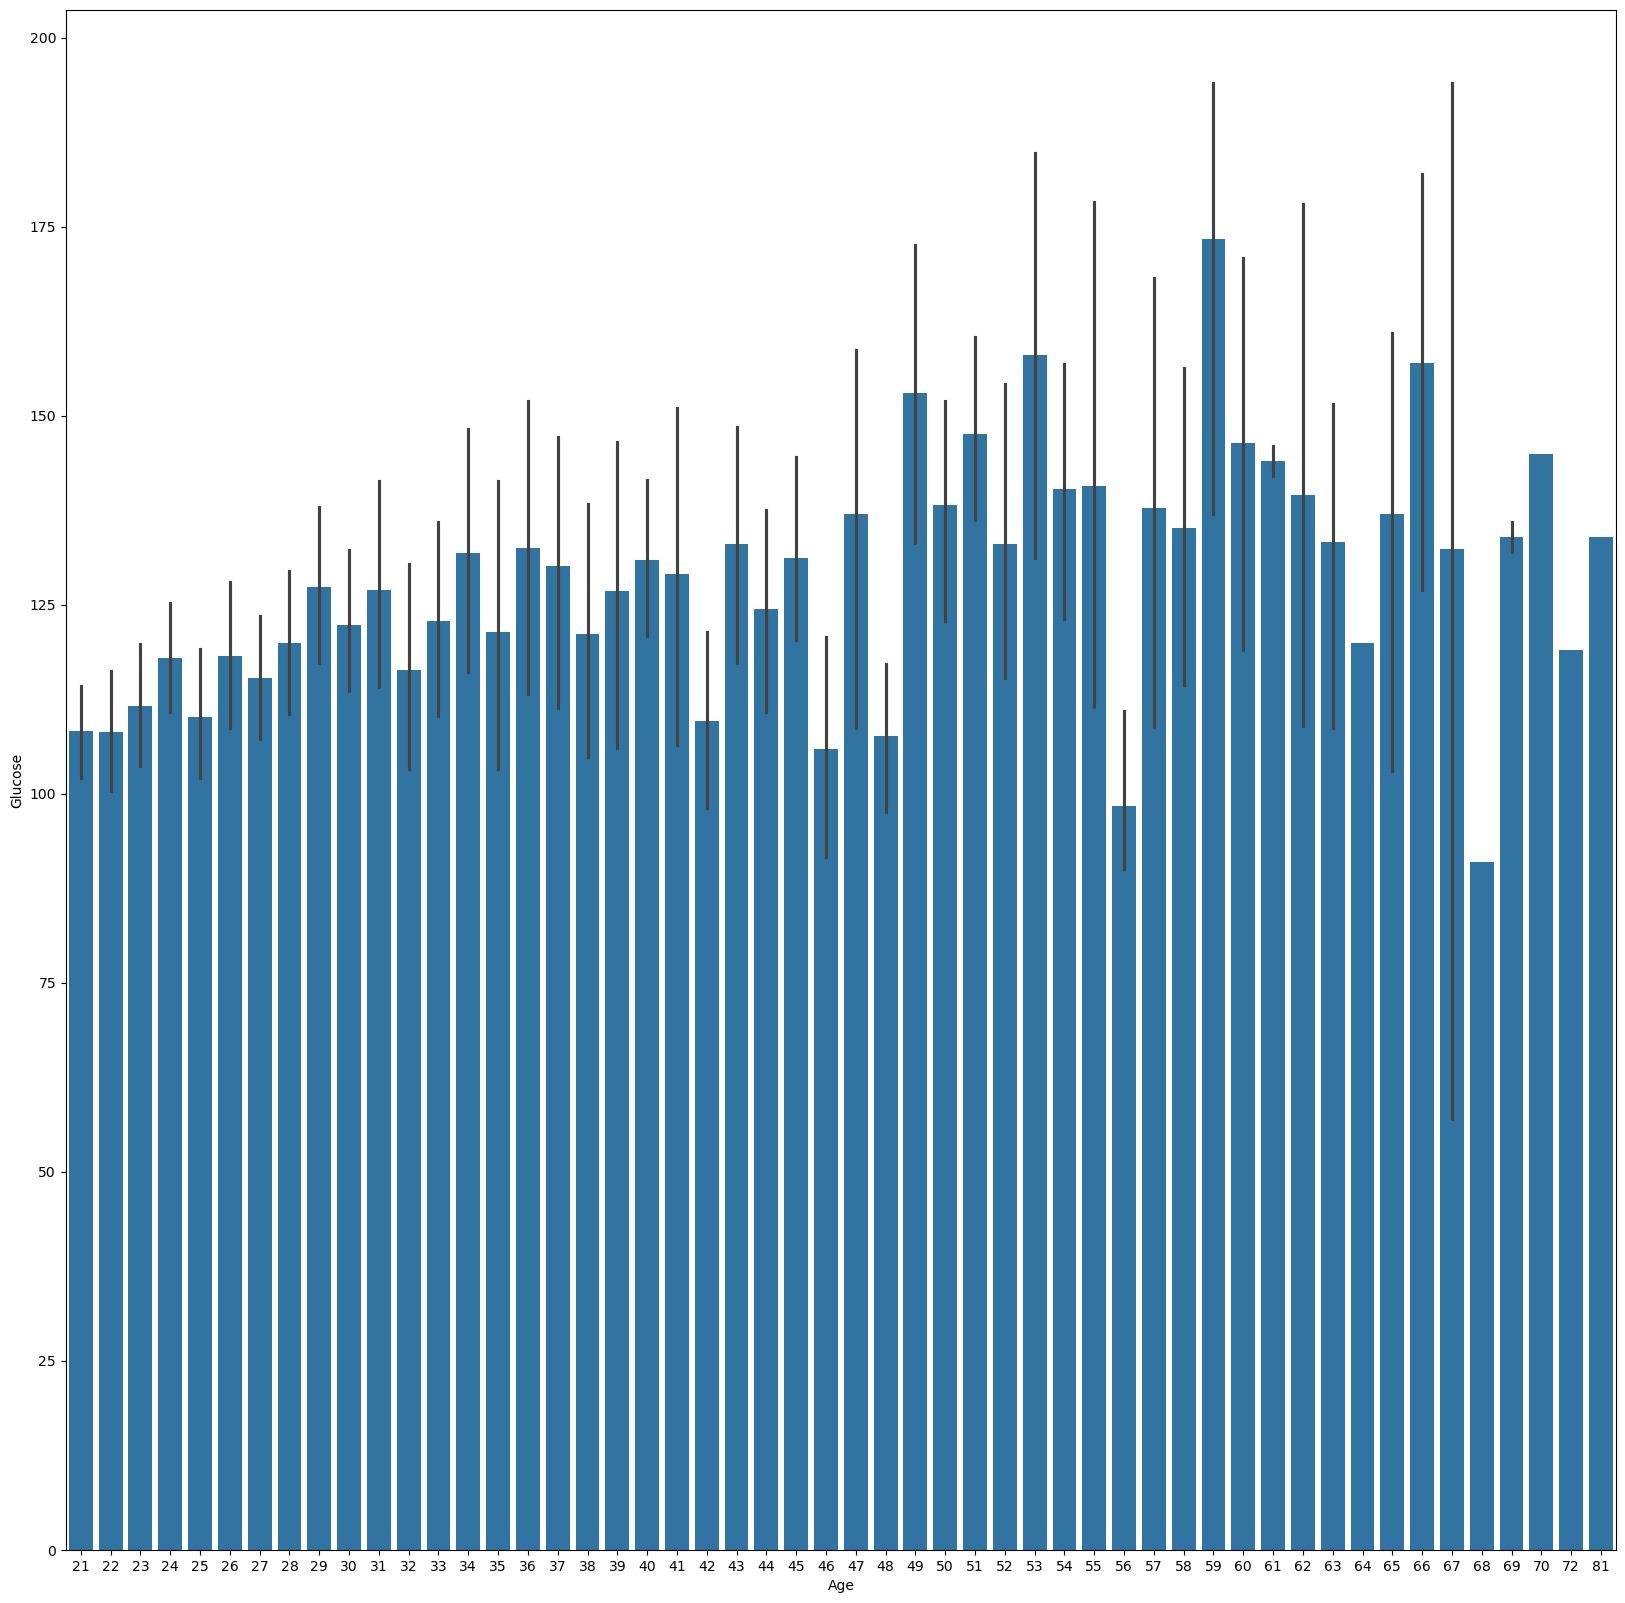

In [78]:
plt.figure(figsize=(20,20))
sns.barplot(x='Age',y='Glucose',data=diabetes)
plt.show()

<Axes: >

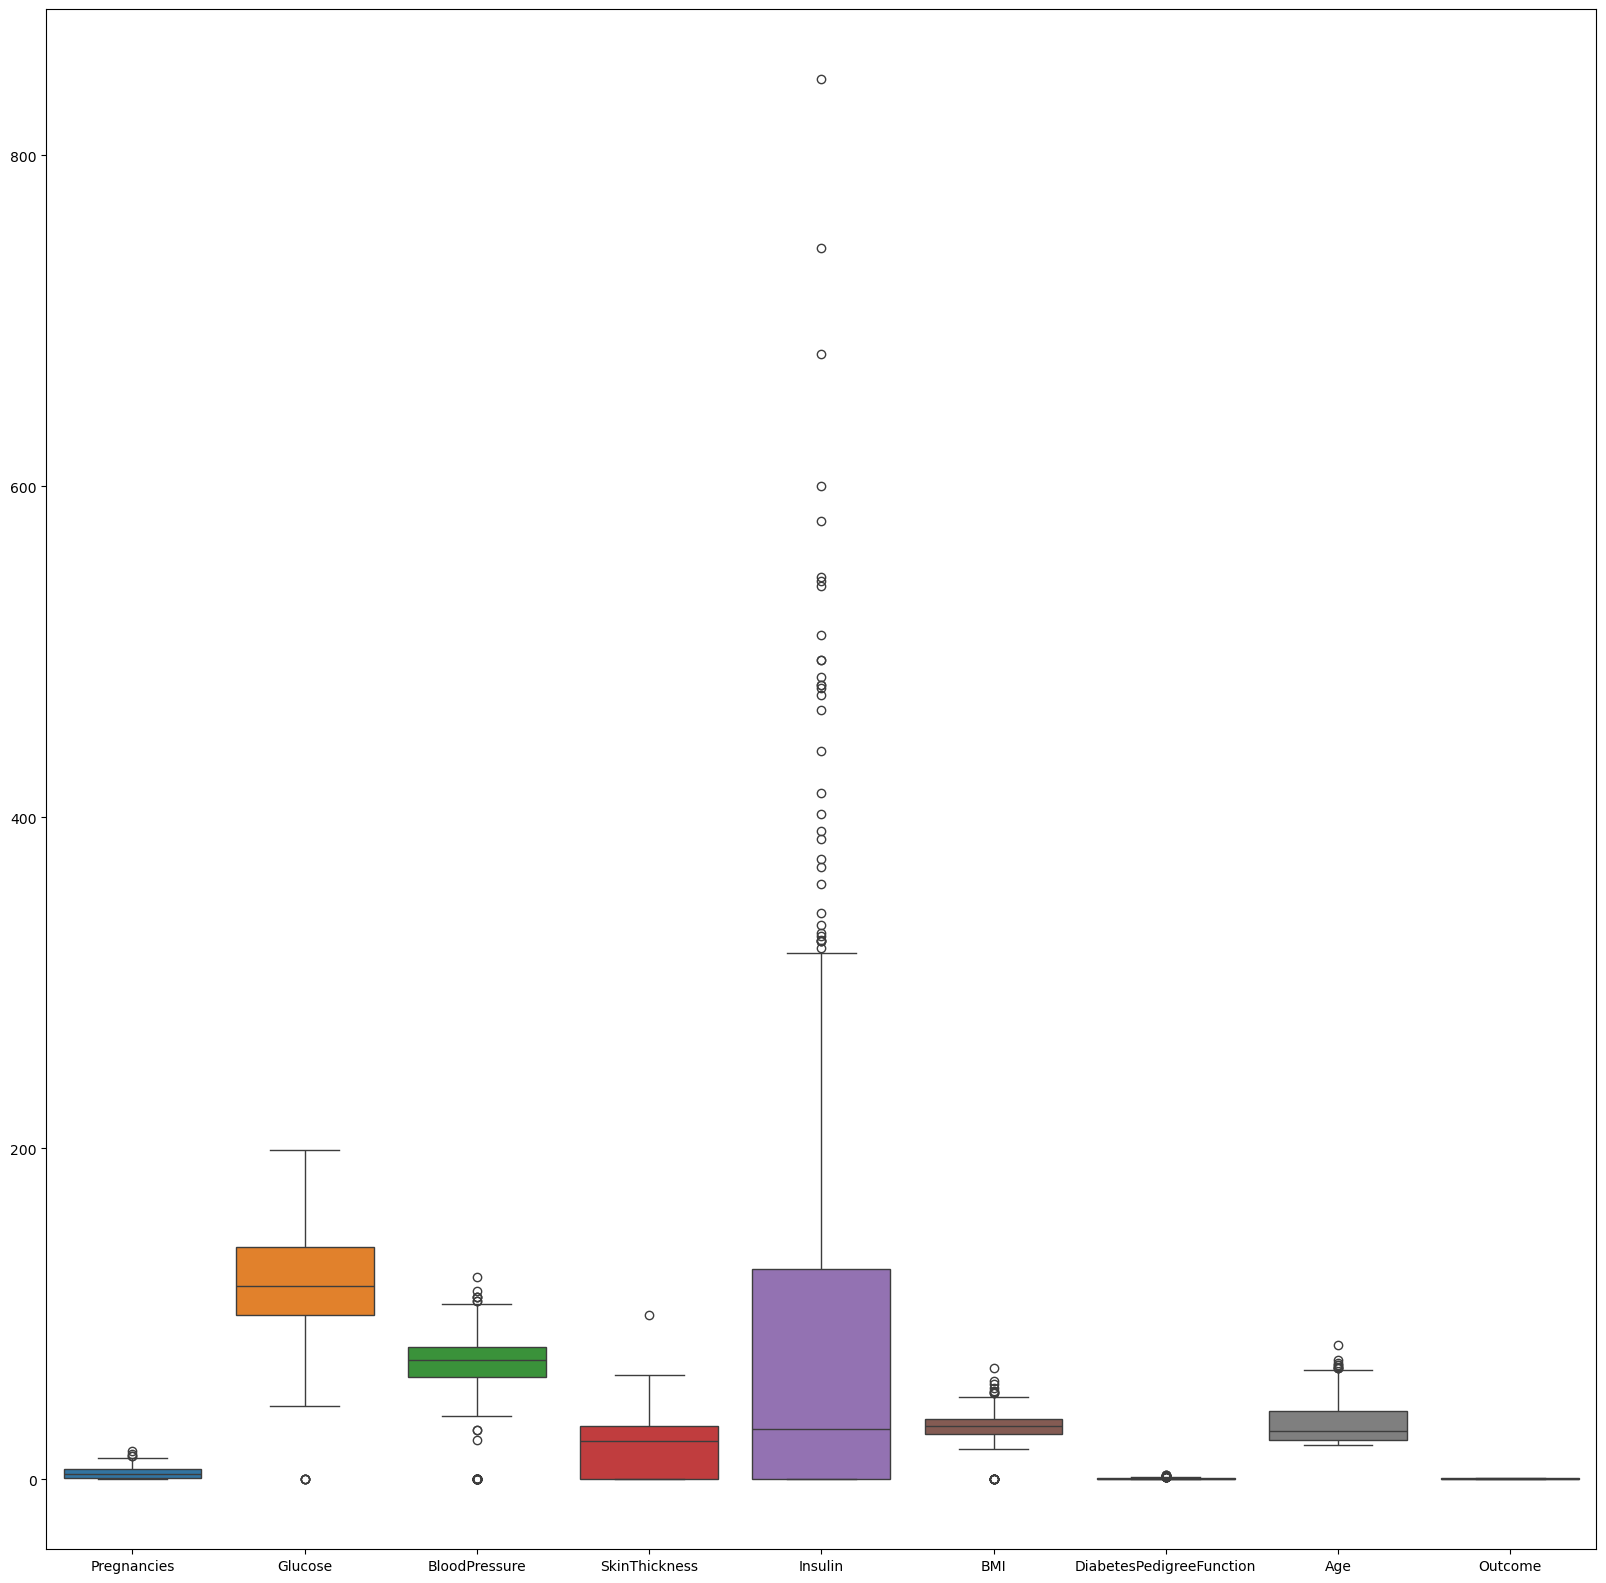

In [79]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=diabetes,ax=ax)

In [80]:
Q1=diabetes.quantile(0.25)
Q3=diabetes.quantile(0.75)

#Calculate the IQR
IQR = Q3-Q1

#Define the outlier boundaries
lower_bound = Q1- 1.5 * IQR
upper_bound = Q3+ 1.5 * IQR

#Create a mask for data within the IQR boundaries
mask = ~((diabetes < lower_bound) | (diabetes > upper_bound)).any(axis=1)

#Remove outliers
cleaned_data = diabetes[mask]

<Axes: >

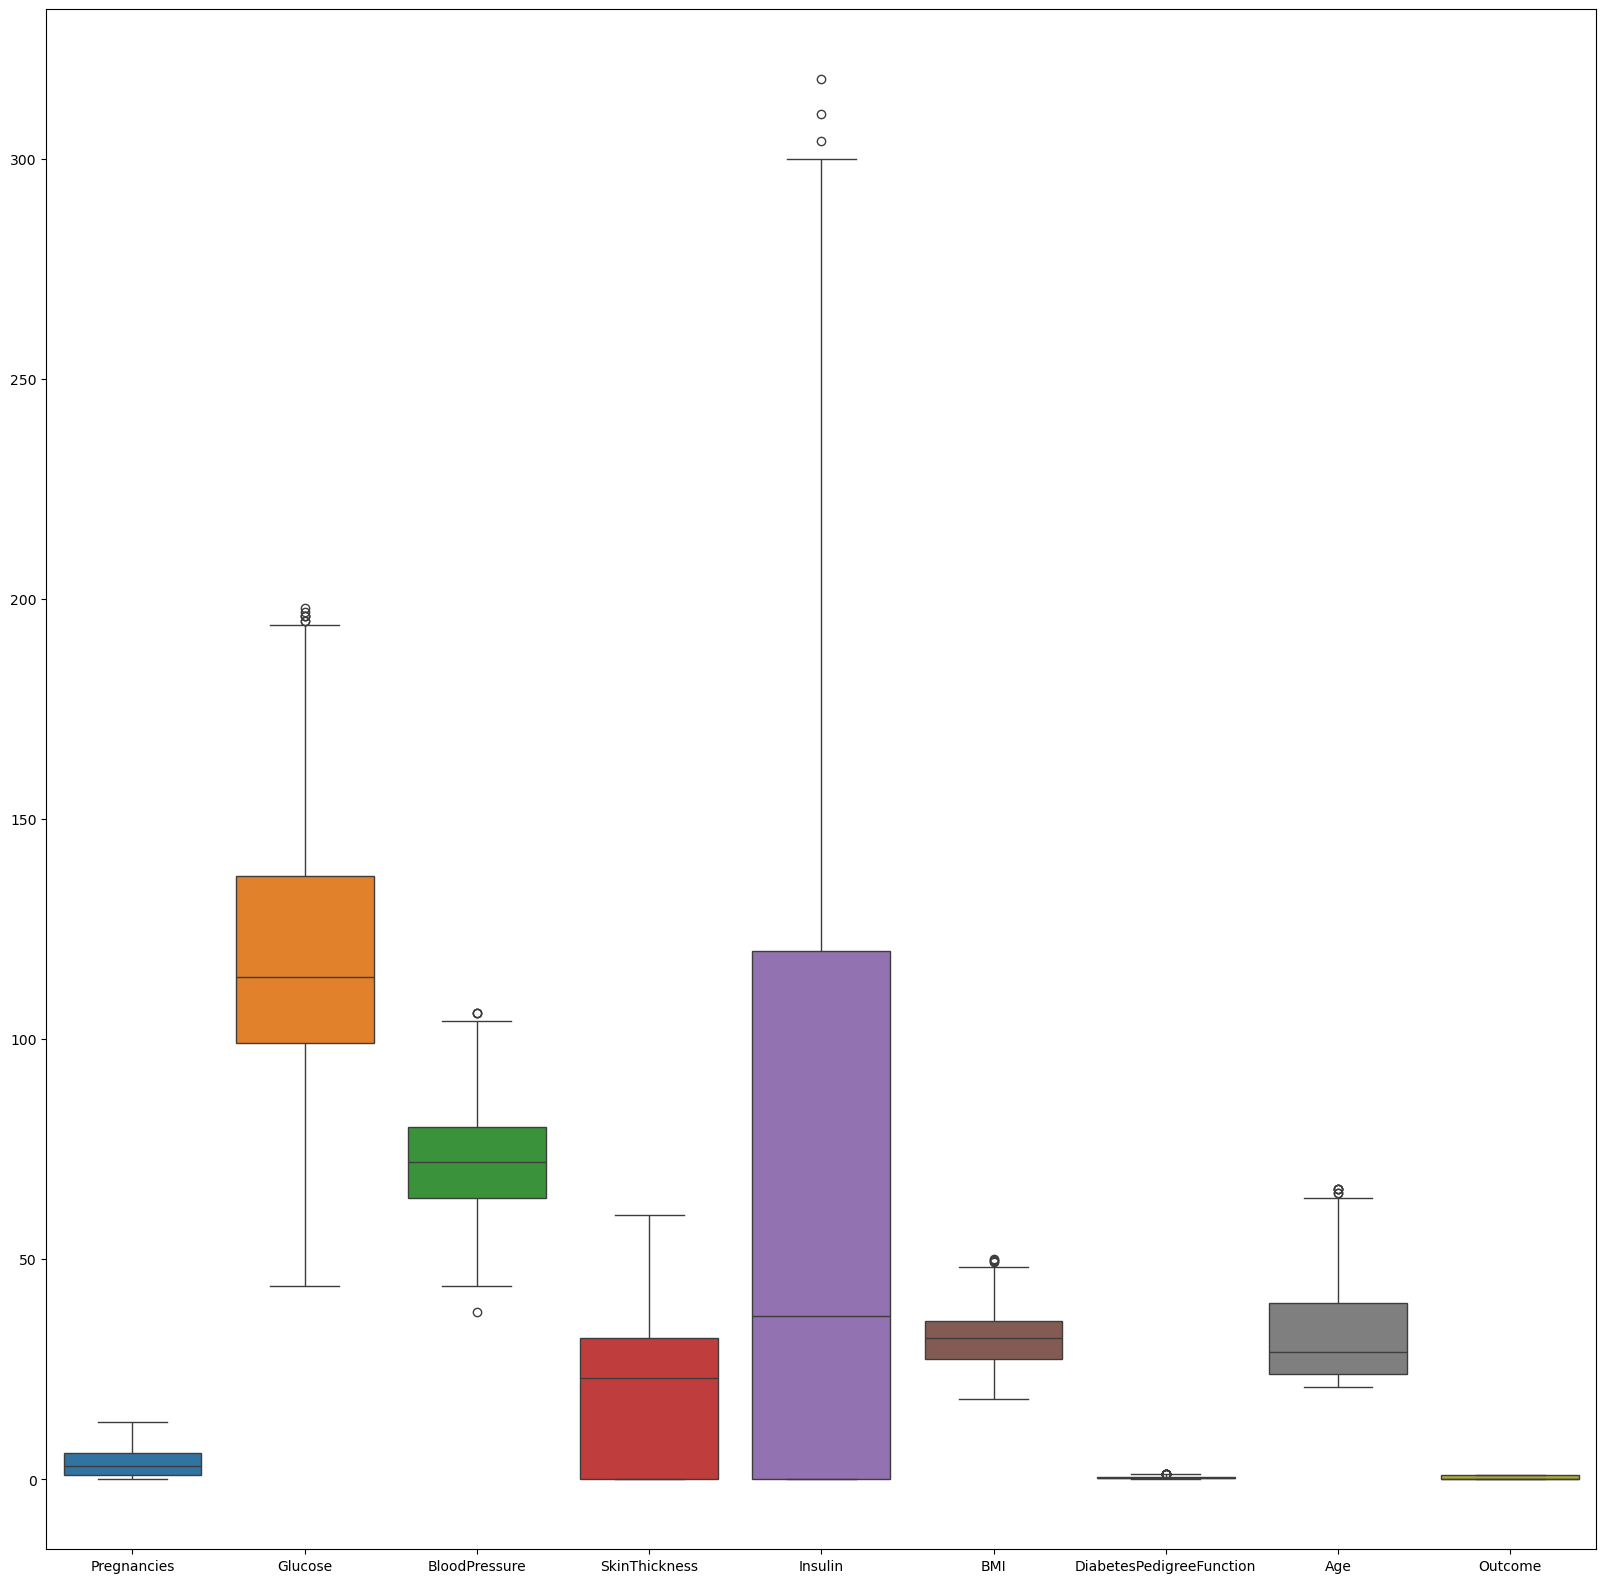

In [81]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(cleaned_data,ax=ax)

In [82]:
cleaned_data.shape

(639, 9)

In [83]:
correlation=cleaned_data.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.142093,0.210666,-0.094425,-0.114510,0.036958,0.009289,0.567438,0.227987
Glucose,0.142093,1.000000,0.238754,-0.004609,0.248225,0.192504,0.066530,0.286682,0.492740
BloodPressure,0.210666,0.238754,1.000000,0.037388,-0.041513,0.303301,0.024290,0.354036,0.183298
SkinThickness,-0.094425,-0.004609,0.037388,1.000000,0.487566,0.390340,0.148486,-0.143376,0.030676
Insulin,-0.114510,0.248225,-0.041513,0.487566,1.000000,0.188635,0.213191,-0.089535,0.097746
BMI,0.036958,0.192504,0.303301,0.390340,0.188635,1.000000,0.144757,0.063370,0.269371
DiabetesPedigreeFunction,0.009289,0.066530,0.024290,0.148486,0.213191,0.144757,1.000000,0.030081,0.179072
Age,0.567438,0.286682,0.354036,-0.143376,-0.089535,0.063370,0.030081,1.000000,0.263344
Outcome,0.227987,0.492740,0.183298,0.030676,0.097746,0.269371,0.179072,0.263344,1.000000


<Axes: >

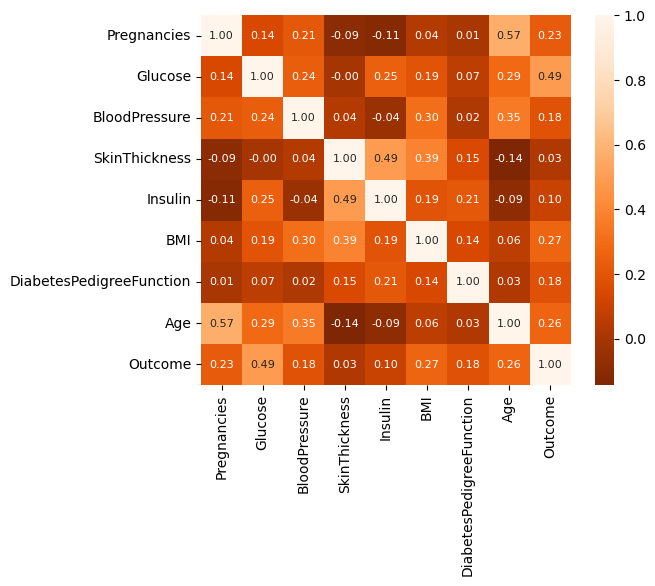

In [84]:
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Oranges_r')

In [85]:
cleaned_data['Outcome'].value_counts()

Outcome
0    439
1    200
Name: count, dtype: int64

In [86]:
x=diabetes.drop('Outcome',axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [87]:
y=diabetes['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [88]:
from imblearn.over_sampling import SMOTE

<Axes: xlabel='Outcome', ylabel='count'>

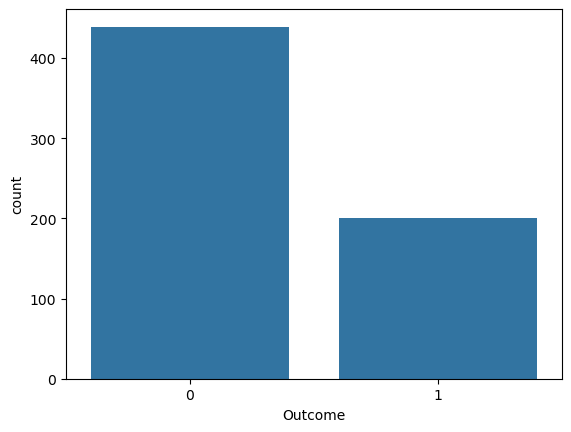

In [89]:
sns.countplot(x='Outcome',data=cleaned_data)

In [90]:
x_resampled.shape

(1000, 8)

In [91]:
x.shape

(768, 8)

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=42)

In [93]:
x_resampled.shape,x_train.shape,x_test.shape,y_resampled.shape,y_test.shape,y_train.shape

((1000, 8), (700, 8), (300, 8), (1000,), (300,), (700,))

In [94]:
model=LogisticRegression()

In [95]:
model.fit(x_train,y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
training_data_predict=model.predict(x_train)
training_data_accuracy=accuracy_score(training_data_predict,y_train)
print("accuracy of training data:",training_data_accuracy)

accuracy of training data: 0.75


In [97]:
testing_data_predict=model.predict(x_test)
testing_data_accuracy=accuracy_score(testing_data_predict,y_test)
print("accuracy of testing data:",testing_data_accuracy)

accuracy of testing data: 0.7466666666666667


In [98]:
cm=confusion_matrix(testing_data_predict,y_test)
cm

array([[112,  39],
       [ 37, 112]], dtype=int64)

Text(0.5, 1.0, 'confusion_matrix')

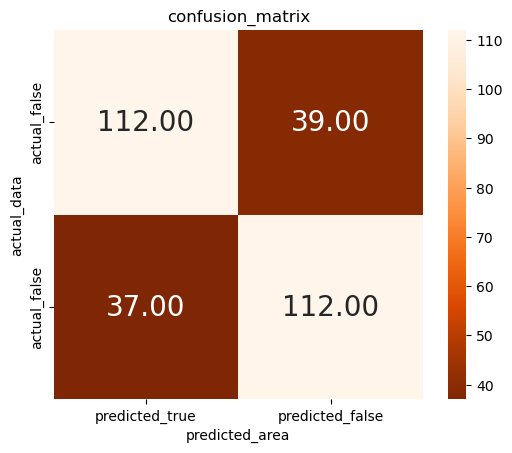

In [99]:
sns.heatmap(cm,annot=True,annot_kws={'size':20},fmt='.2f',cmap='Oranges_r',square=True,
            xticklabels=['predicted_true','predicted_false'],
            yticklabels=['actual_false','actual_false'])
plt.xlabel('predicted_area')
plt.ylabel('actual_data')
plt.title('confusion_matrix')

In [100]:
print(classification_report(testing_data_predict,y_test))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75       151
           1       0.74      0.75      0.75       149

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



In [101]:
input_data=(6,	148,	72,	35,	0,	33.6,	0.627,	50)
input_data_as_np=np.array(input_data)
input_data_reshaped=input_data_as_np.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
if prediction[0]==0:
    print('0')
else:
    print('1')

1


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [102]:
input_data=(10,	101,	76,	48,	180,	32.9,	0.171,	63)
input_data_as_np=np.array(input_data)
input_data_reshaped=input_data_as_np.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
if prediction[0]==0:
    print('0')
else:
    print('1')

0


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
